# 데이터 전처리 및 증강

- 128 * 128 이미지로 변환
- 크롭, 반전, 회전 등의 효과를 입혀 증강효과를 얻음

*자동차 특성상 위아래 반전한 사진은 고려 하지 않도록 함*

In [80]:
from PIL import Image
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.RandomResizedCrop((128, 128), scale=(0.8, 1.0)), # 원본 이미지의 80%에서 100% 사이 크기로 크롭 후 128 * 128 로 조절
    transforms.RandomHorizontalFlip(), # 50% 확률로 좌우 반전
    transforms.RandomRotation(degrees=15), # -30도에서 +30도 사이로 무작위 회전
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1), # 밝기, 대비, 채도, 색조를 ±20%, ±20%, ±20%, ±0.1 의 변화
    transforms.ToTensor(), # 모델에 입력 위해 이미지를 PyTorch 텐서로 변환을
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # 픽셀 값 [-1, 1] 범위에 분포하게 변환
])

| 함수                   | 설명                 |    
|-----------------------|---------------------|
|Resize                 |이미지의 크기를 조정합니다.|
|CenterCrop             |이미지의 중앙을 기준으로 정사각형으로 잘라냅니다.|
|RandomCrop	            |이미지에서 무작위로 선택한 위치를 기준으로 정사각형으로 잘라냅니다.|
|RandomHorizontalFlip   |주어진 확률로 이미지를 수평으로 뒤집습니다.|
|RandomVerticalFlip	    |주어진 확률로 이미지를 수직으로 뒤집습니다.|
|ToTensor	            |PIL 이미지나 NumPy ndarray를 PyTorch 텐서로 변환합니다.|
|Normalize	            |채널별로 평균과 표준편차를 사용하여 이미지를 정규화합니다.|
|ColorJitter	        |이미지의 밝기, 대비, 포화도, 색조를 무작위로 변경합니다.|
|RandomRotation	        |주어진 각도 범위 내에서 이미지를 무작위로 회전시킵니다.|
|RandomResizedCrop	    |원본 이미지에서 무작위 크기와 비율로 잘라내어 주어진 크기로 리사이징합니다.|
|Grayscale	            |이미지를 회색조로 변환합니다.|
|Compose	            |여러 변형(transforms)을 하나로 결합하여 순차적으로 적용합니다.|

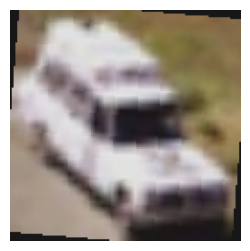

In [92]:
# 예시 이미지 생성 코드
image_path = '../Image/1.Preprocessing/ambulance_s_000101.png'
image = Image.open(image_path)

preprocessed_image = transform(image)

unnormalize = transforms.Normalize((-1, -1, -1), (2, 2, 2))
preprocessed_image = unnormalize(preprocessed_image).clip(0, 1)

preprocessed_image_path = '../Image/1.Preprocessing/preprocessed_image6.jpg'
transforms.ToPILImage()(preprocessed_image).save(preprocessed_image_path) # 변환된 파일 저장

# 변환된 파일 주피터 노트북에 그리기
pil_image = transforms.ToPILImage()(preprocessed_image)
plt.figure(figsize=(3, 3)) 
plt.imshow(pil_image)
plt.axis('off')
plt.show()

원본 이미지 -> 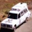(../Image/1.Preprocessing/ambulance_s_000101.png)를 <br>
위 코드
-  원본 이미지의 80%에서 100% 사이 크기로 크롭 후 128 * 128 로 조절
-  50% 확률로 좌우 반전
-  -30도에서 +30도 사이로 무작위 회전
-  밝기, 대비, 채도, 색조를 ±20%, ±20%, ±20%, ±0.1 의 변화
-  모델에 입력 위해 이미지를 PyTorch 텐서로 변환을
-  픽셀 값 [-1, 1] 범위에 분포하게 변환
  
한 결과 
<br> <br>
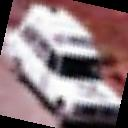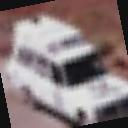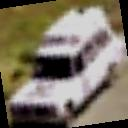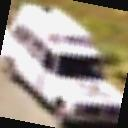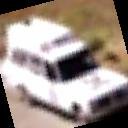
<br> <br>
위 5장 처럼 랜덤하게 변화를 주어 입력 사진 하나로<br>
<span style="color:pink">데이터를 증강하는 효과</span>와 모델 입력에 맞게 형식을 바꾸는 것을 알 수 있음

In [79]:
# train 데이터셋 로드
train_dataset = datasets.ImageFolder(root='../Dataset/Train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# test 데이터셋 로드
test_dataset = datasets.ImageFolder(root='../Dataset/Test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)